## MODELO: Regresión Lineal
- Predecir el precio del inmueble según el **m^2** ingresado por el agende inmobiliario.

## NOTACIONES:

| NOTACIÓN   | DESCRIPCION | PYTHON |
| -------------------| ------------------------ | ------------------------ |
| $x$              | Equivalente al tamaño del inmueble **(m^2)**                    | x_train                      |
| $y$               | Equivalente al precio en $ de 1000                      | y_train                      |
| $x(i),y(i)$               | Entrenamiento equivalente a las notaciones de **(x / y)**                     | x_i, y_i                      |
| $m$               | Números de entrenamiento                      | m                      |
| $w$               | Asignar valor de predicción  **(weight)**                    | x(w)                      |
| $b$               | Ajustar la predicción **(bias)**                     | +(b)                      |
| $f_{w,b}(x^{(i)})$             | Resultado de modelo segun aprendizaje del entrenamiento. Apply formula $f_{w,b}(x^{(i)}) = wx^{(i)}+b$                      | f_wb                      |

### Celda #1
- Importar librerias
- Import libraries

In [1]:
# libraries import
import numpy as np
import matplotlib.pyplot as plt
from utils import *
plt.style.use('./deeplearning.mplstyle')

### Celda #2 - Dataset
- Descripción: crear variables de entrenamiento y almacenamiento la data en un array unidimensinal de NumPy
- Description: create training variables and store the data in a one-dimensional NumPy array

In [2]:
"""
x_train = np.array([1.0, 2.0, 3.0])
y_train = np.array([3000.0, 1500.0, 4000.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")
"""
x_train, y_train = load_data()

print("x_train: ", {type(x_train)})
print(f"x_train = {x_train}")

print("y_train: ", {type(y_train)})
print(f"y_train = {y_train}")

x_train:  {<class 'numpy.ndarray'>}
x_train = [ 15.  20.  25.  30.  40.  45.  50.  55.  60.  70.  80.  90. 110. 120.
 150. 180. 190. 220. 230. 245.]
y_train:  {<class 'numpy.ndarray'>}
y_train = [ 15000.  30000.  36000.  45000.  55000.  61000.  70000.  75000.  80000.
  86000.  95000. 100000. 120000. 150000. 180000. 210000. 218000. 230000.
 250000. 275000.]


### Celda #3 - Number of training
- Número de entrenamiento 
- Number training

In [3]:
m = len(x_train)
print(f"Numbero de entrenamiento: {m}")

Numbero de entrenamiento: 20


### Celda #4: Apply training
- Aplicar entrenamiento, iniciar índice 0
- Apply training, start index 0

In [4]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (15.0, 15000.0)


### Celda #5: Data points y / x
- Trazando los datos con matplotlib
- Plotting the data with matplotlib

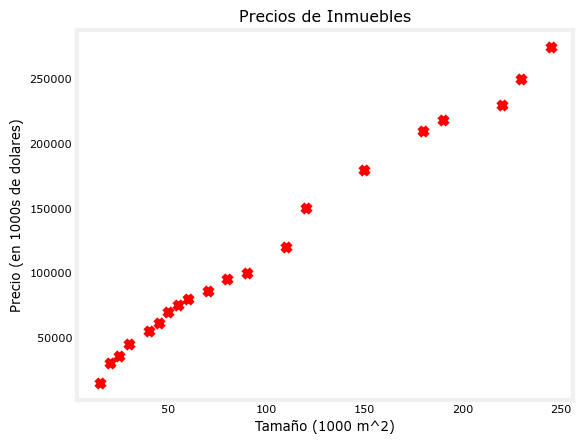

In [5]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Precios de Inmuebles")
# Set the y-axis label
plt.ylabel('Precio (en 1000s de dolares)')
# Set the x-axis label
#plt.xlabel('Tamaño (1000 sqft)')
plt.xlabel('Tamaño (1000 m^2)')
plt.show()

### Celda #6: Assign value the parameters w / b
- Asignar valor al párametro **(w)** de predicción y asignar filtro incial al parametro **(b)** de predicción.
- Assign value to the prediction parameter **(w)** and assign initial filter to prediction parameter **(b)**

In [6]:
w = 1200
b = 300
print(f"w: {w}")
print(f"b: {b}")

w: 1200
b: 300


### Celda #7: Implement function applying formula $f_{w,b}(x^{(i)}) = wx^{(i)}+b$
- Implementar la función compute_model_output para calcular la salida de los datos procesados.
- Implement the compute_model_output function for calculate the output processed data.

In [7]:
# apply formula: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$
def compute_model_output(x, w, b):    
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

### Celda #8: Plot the output with matplotlib (graph line: blue prediction, read: values x / y)
- Trazar la salida con matplotlib invocando a la función compute_model_output
- Plot the output with matplotlib calling the compute_model_output function

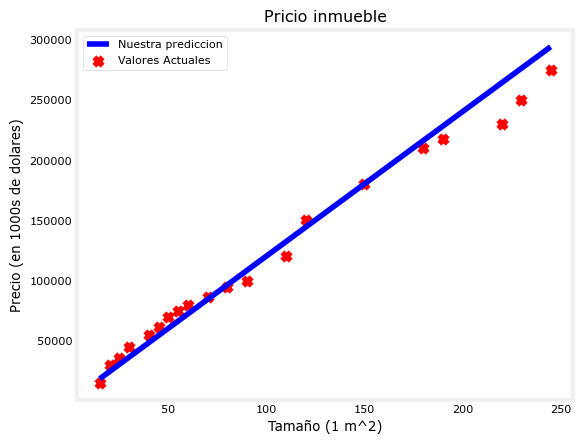

In [8]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Nuestra prediccion')
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Valores Actuales')

# Set the title
plt.title("Pricio inmueble")
# Set the y-axis label
plt.ylabel('Precio (en 1000s de dolares)')
# Set the x-axis label
#plt.xlabel('Tamaño (1000 sqft)')
plt.xlabel('Tamaño (1 m^2)')
plt.legend()
plt.show()

### Celda #8: Predict the price of houses according to size in sqft
- Con el modelo construido, vamos a predecir el precio de una casa con 1600 pies cuadrados. Dado que las unidades están en miles de pies cuadrados, es 1,6.
- With model built, let's predict the price of a house with 1600 sqft. Since the units of  are in 1000's of sqft,  is 1.6.

In [9]:
def costInmueble(m_2):
    w = 1200
    b = 300 
    x_i = m_2 #round(mts_pies(m_2)/ 1000,3)    
    cost_in_pies = w * x_i + b
    #print(f"Inmueble valorizado en $ {format(cost_in_pies, '0,.2f')} miles de dolares, con un tamaño de {m_2:.0f} m^2")
    return f"Inmueble valorizado en $ {format(cost_in_pies, '0,.2f')} miles de dolares, con un tamaño de {m_2:.0f} m^2"

In [10]:
costInmueble(90)

'Inmueble valorizado en $ 108,300.00 miles de dolares, con un tamaño de 90 m^2'